In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# df1 = pd.read_csv("articles1.csv")
# df2 = pd.read_csv("articles2.csv")
# df3 = pd.read_csv("articles3.csv")

# df = pd.concat([df1, df2, df3])

# df.to_csv('articles.csv',index=False)

In [4]:
!pip install 

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.3 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.3 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/9.3 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.3 MB 7.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.3 MB 7.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.0/9.3 MB 7.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/9.3 MB 7.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.3 MB 7.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.3 MB 7.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.5/9.3 MB 7.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.8/9.3 MB 7.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.3 MB 7.5 MB/s eta 0:00:01
   ----------------

In [66]:
df = pd.read_csv('articles.csv')

In [67]:
df.head()

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                             content  
0  WASHINGTON  —   Congressional Republicans have...  
1  After the bullet shells get counted, the blood...  
2  When Walt Disney’s “Bambi” opened in 1942, cri...  
3  Death may be the great equalizer, but it isn’t...  
4  SEOUL, South Korea  —   North Korea’s leader, ...

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142570 entries, 0 to 142569
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           142570 non-null  int64  
 1   title        142568 non-null  object 
 2   publication  142570 non-null  object 
 3   author       126694 non-null  object 
 4   date         139929 non-null  object 
 5   year         139929 non-null  float64
 6   month        139929 non-null  float64
 7   url          85559 non-null   object 
 8   content      142570 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 9.8+ MB


In [69]:
df.dropna(subset=['title'], inplace=True)

In [70]:
df.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News',
       'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters',
       'Vox', 'Washington Post'], dtype=object)

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

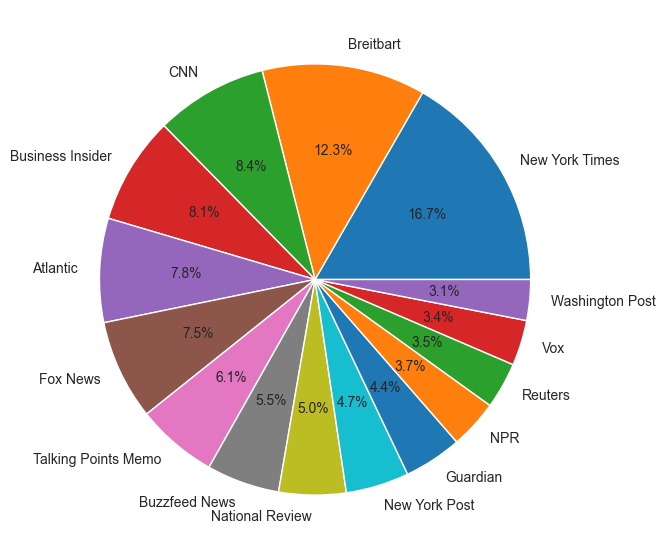

In [73]:
plt.pie(df['publication'].value_counts(), labels=df['publication'].unique().tolist(), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.show()

### Exploratory Data Analaysis

#### Counts and Length:
Start by checking how long the reviews are

1. Character count
2. Word count
3. Mean word length
4. Mean sentence length

In [74]:
df['Length'] = df['content'].str.len()

In [75]:
df[['content','Length']]

content  Length
0       WASHINGTON  —   Congressional Republicans have...    5607
1       After the bullet shells get counted, the blood...   27834
2       When Walt Disney’s “Bambi” opened in 1942, cri...   14018
3       Death may be the great equalizer, but it isn’t...   12274
4       SEOUL, South Korea  —   North Korea’s leader, ...    4195
...                                                   ...     ...
142565           Uber driver Keith Avila picked up a p...    4563
142566           Crews on Friday continued to search L...    3514
142567       When the Obama administration announced a...    6911
142568       This story has been updated. A new law in...    4133
142569       The nation’s first recreational marijuana...    4878

[142568 rows x 2 columns]

**2. Word Count**

In [76]:
def find_word_count(x):
    x_list = x.split()
    return len(x_list)

In [77]:
df['Word_count'] = df['content'].apply(find_word_count)

In [79]:
df[['content','Word_count']].head(10)

content  Word_count
0  WASHINGTON  —   Congressional Republicans have...         884
1  After the bullet shells get counted, the blood...        4770
2  When Walt Disney’s “Bambi” opened in 1942, cri...        2389
3  Death may be the great equalizer, but it isn’t...        2119
4  SEOUL, South Korea  —   North Korea’s leader, ...         694
5  LONDON  —   Queen Elizabeth II, who has been b...         159
6  BEIJING  —   President Tsai   of Taiwan sharpl...         571
7  Danny Cahill stood, slightly dazed, in a blizz...        3194
8  Just how   is Hillary Kerr, the    founder of ...        1610
9  Angels are everywhere in the Muñiz family’s ap...         818

**3. Mean Word Length**

In [80]:
df['mean_word_length'] = df['content'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df[['content','mean_word_length']].head(10)

content  mean_word_length
0  WASHINGTON  —   Congressional Republicans have...          5.303167
1  After the bullet shells get counted, the blood...          4.807128
2  When Walt Disney’s “Bambi” opened in 1942, cri...          4.812892
3  Death may be the great equalizer, but it isn’t...          4.748938
4  SEOUL, South Korea  —   North Korea’s leader, ...          4.978386
5  LONDON  —   Queen Elizabeth II, who has been b...          4.679245
6  BEIJING  —   President Tsai   of Taiwan sharpl...          5.197898
7  Danny Cahill stood, slightly dazed, in a blizz...          4.612711
8  Just how   is Hillary Kerr, the    founder of ...          4.501863
9  Angels are everywhere in the Muñiz family’s ap...          4.573350

**4. Mean Sentence Length**

In [81]:
df['mean_sent_length'] = df['content'].apply(lambda x: np.mean([len(sent) for sent in tokenize.sent_tokenize(x)]))
df[['content','mean_sent_length']].head(10)

content  mean_sent_length
0  WASHINGTON  —   Congressional Republicans have...        214.692308
1  After the bullet shells get counted, the blood...        128.455814
2  When Walt Disney’s “Bambi” opened in 1942, cri...        120.878261
3  Death may be the great equalizer, but it isn’t...        154.367089
4  SEOUL, South Korea  —   North Korea’s leader, ...        166.840000
5  LONDON  —   Queen Elizabeth II, who has been b...        129.285714
6  BEIJING  —   President Tsai   of Taiwan sharpl...        153.347826
7  Danny Cahill stood, slightly dazed, in a blizz...        108.072727
8  Just how   is Hillary Kerr, the    founder of ...        107.426829
9  Angels are everywhere in the Muñiz family’s ap...         75.416667

In [249]:
def visualize(col):
    plt.figure(figsize=(25, 8))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], hue=df['publication'])
    plt.ylabel(col, labelpad=11.5)
    plt.ylim(-1*df[col].max()/10, df[col].max(),5000)
    
    plt.subplot(1, 2, 2)
    for publication in df['publication'].unique():
        sns.kdeplot(df[df['publication'] == publication][col], label=publication)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(df['publication'].unique())
    plt.xlim(-1*df[col].max()/10, df[col].max())

    plt.show()

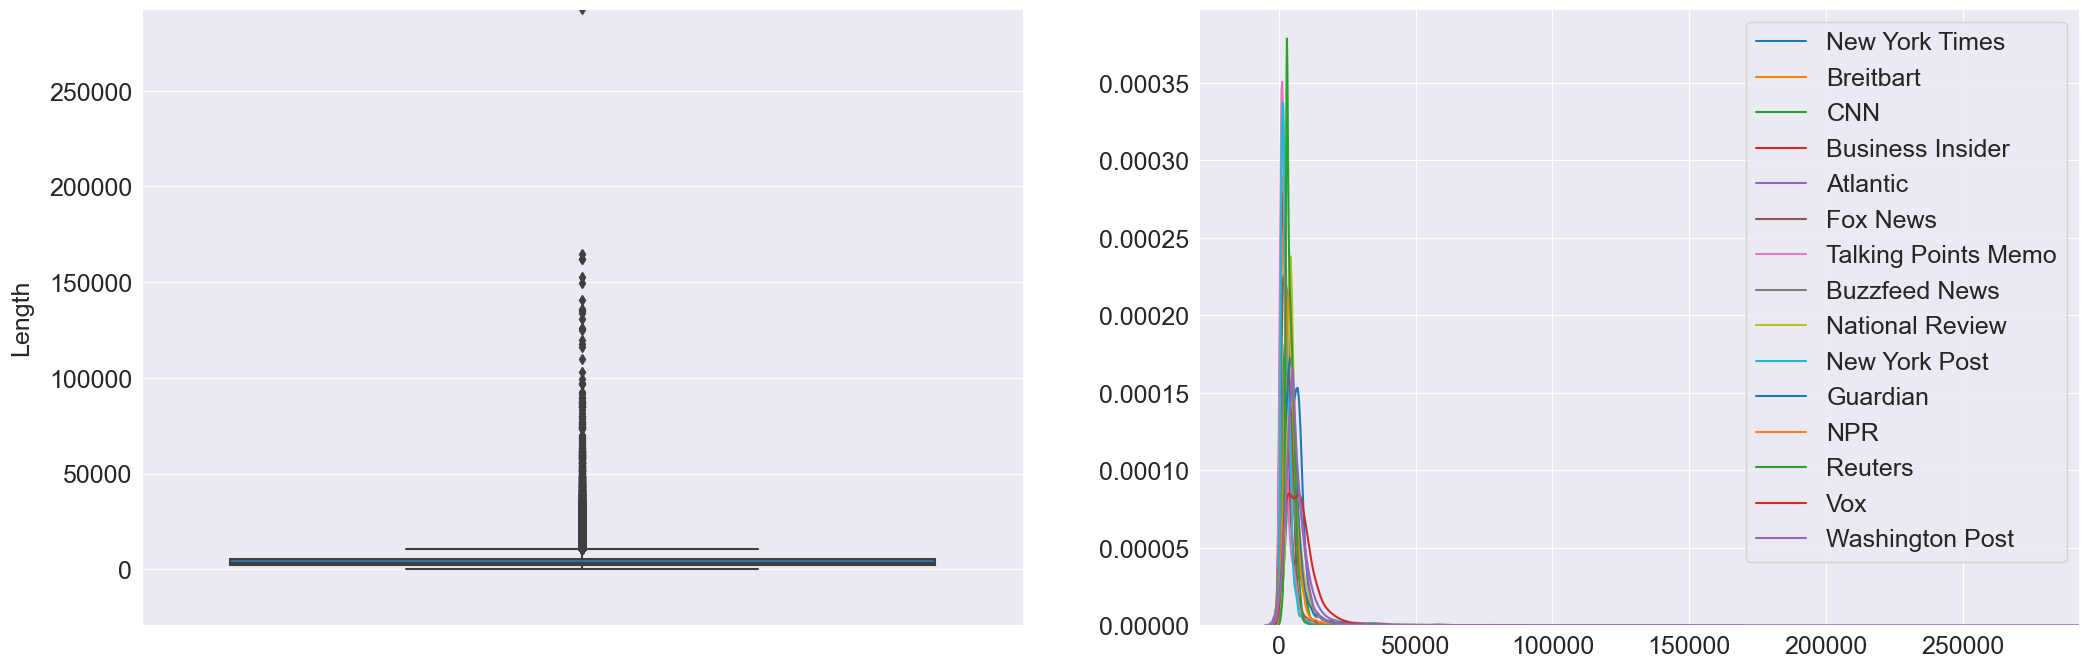

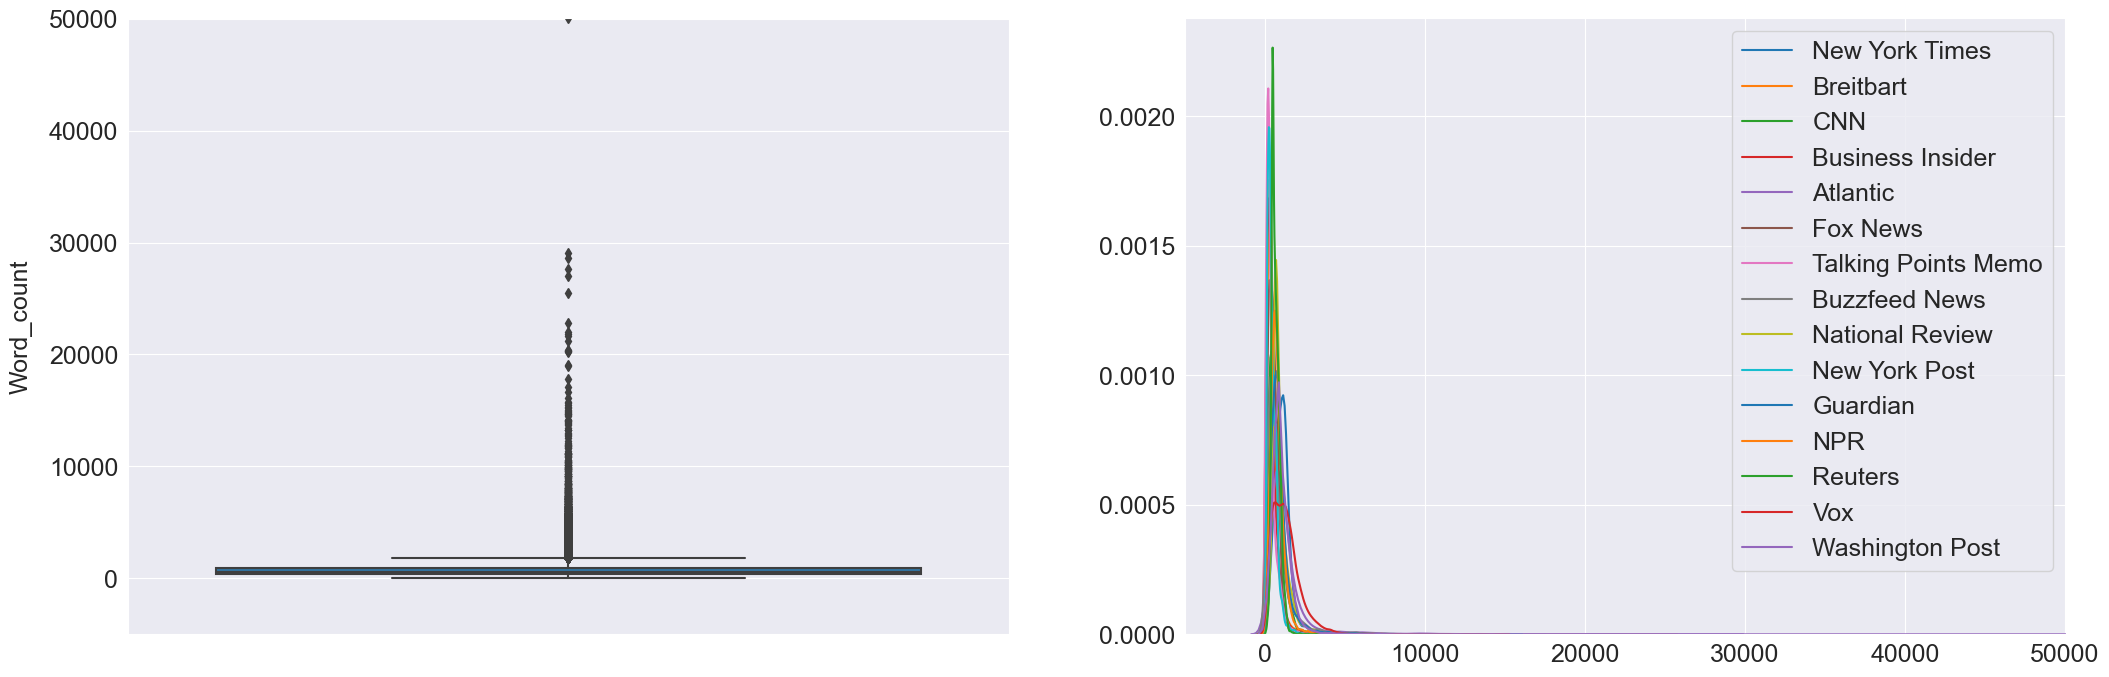

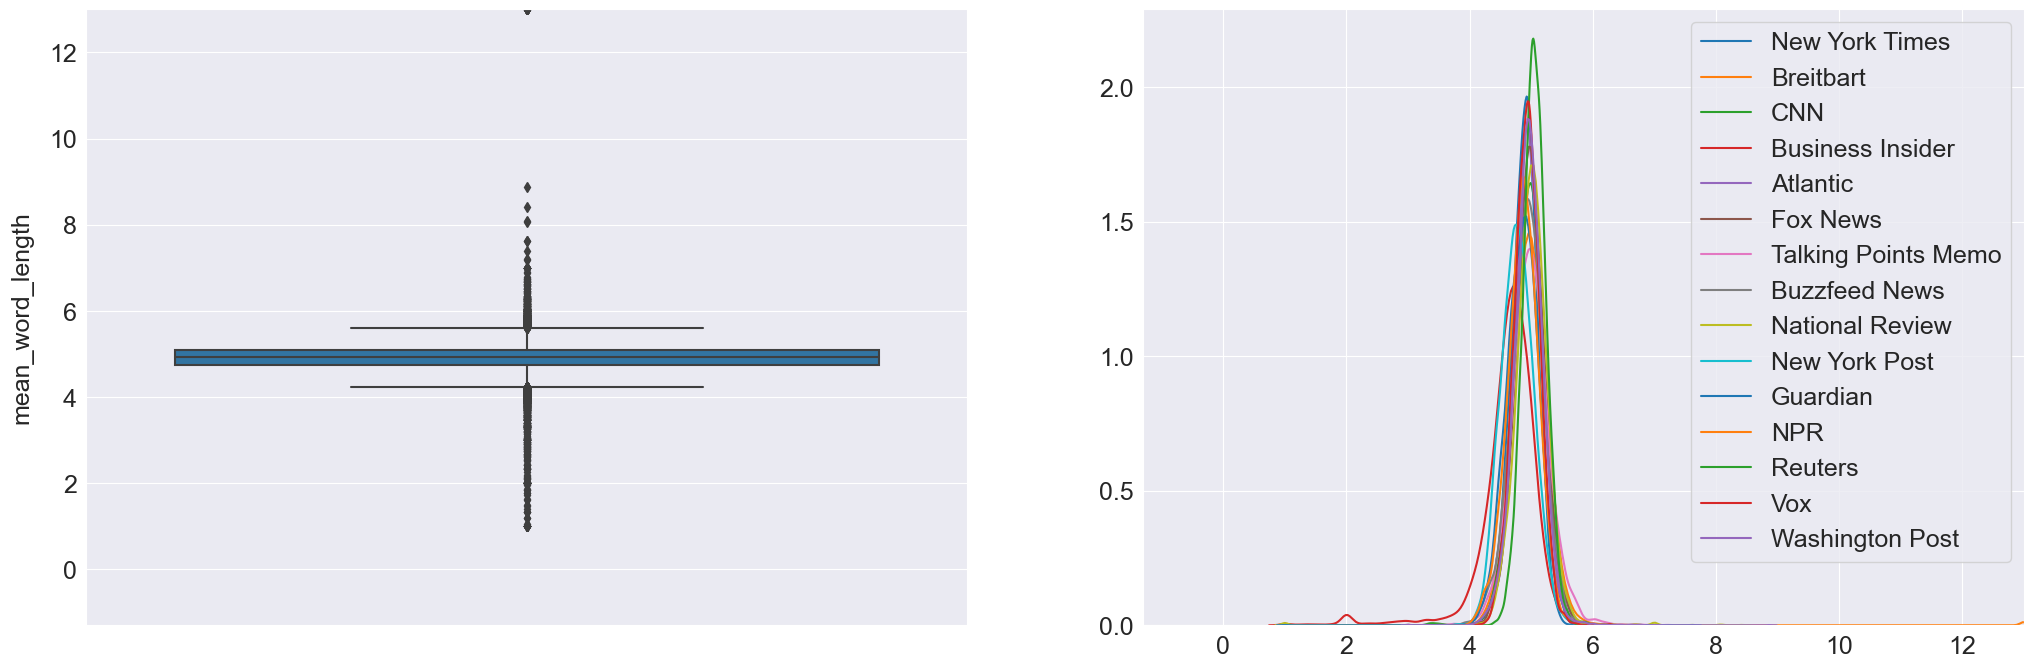

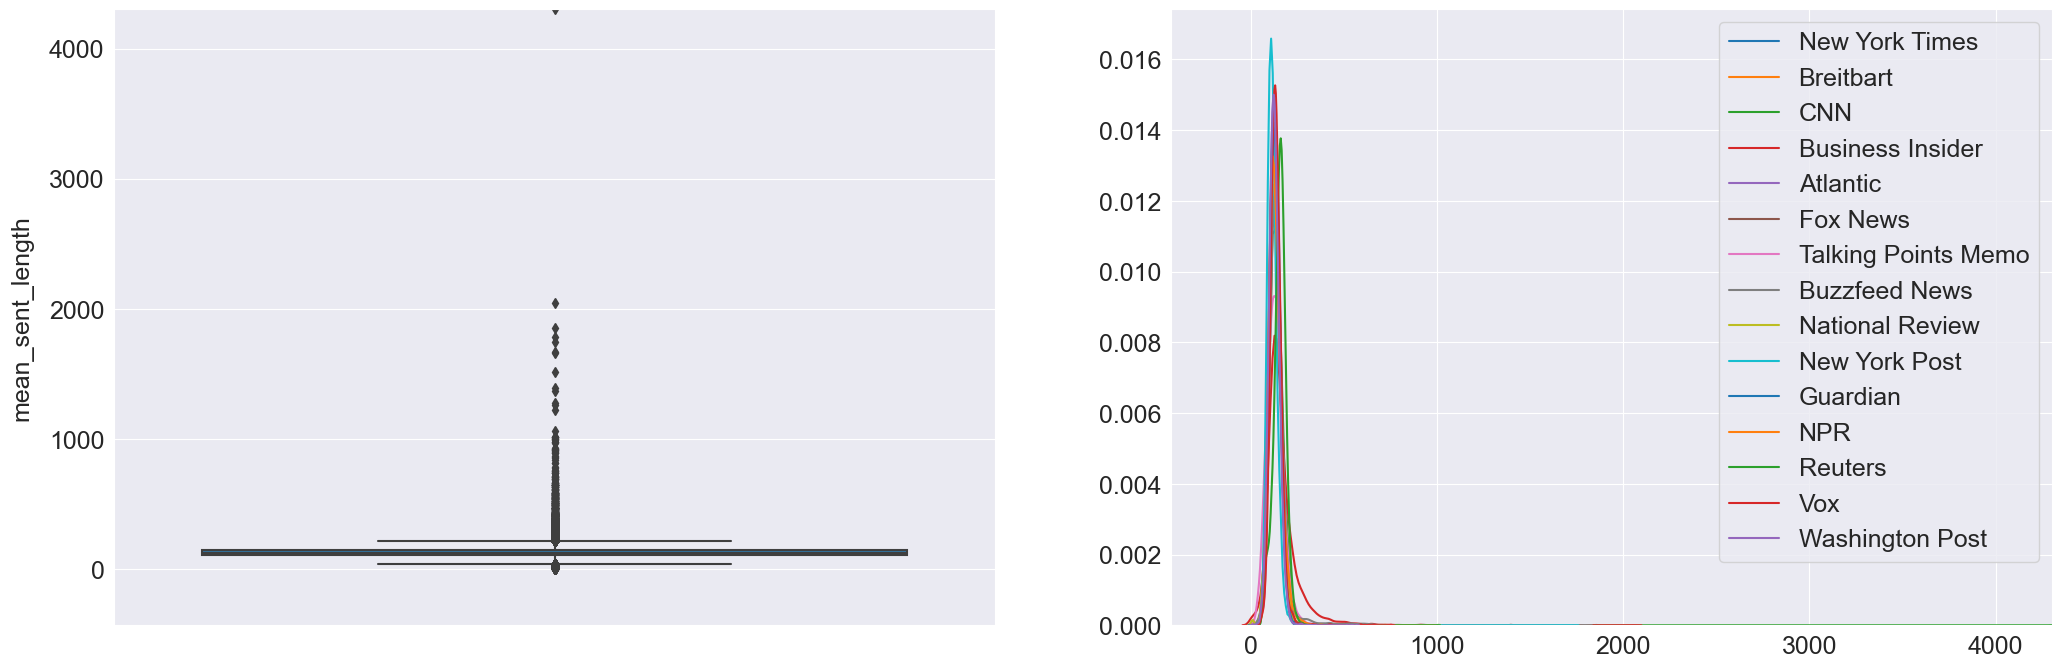

TypeError: Vertical orientation requires numeric `y` variable.

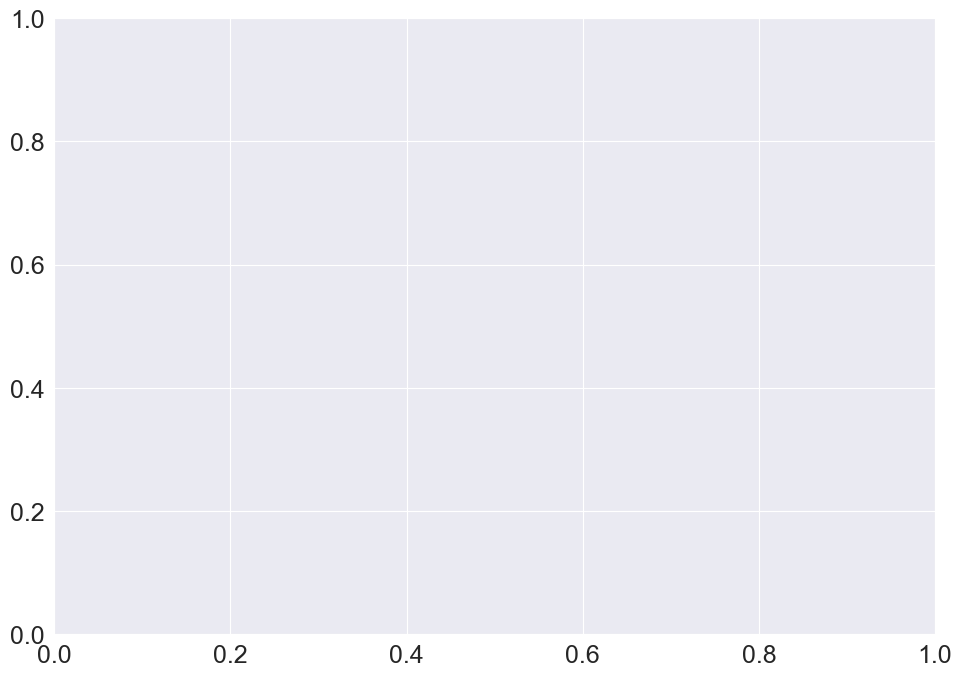

In [250]:
features = df.columns.tolist()[9:]
for feature in features:
    visualize(feature)

There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.

1. Lowercase
2. Remove punctutations
3. Stopword removal

In [19]:
from nltk.corpus import stopwords

pattern = re.compile('[^a-zA-Z0-9\s-]+')
stop_words = set(stopwords.words('english'))

def clean(content):
    content = content.lower()
    content = re.sub(pattern, '', content)
    content = " ".join(word for word in content.split() if word not in stop_words)
    
    return content

In [20]:
df['content_t'] = df['content'].apply(clean)
df.head(10)

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   
5  17288  Sick With a Cold, Queen Elizabeth Misses New Y...  New York Times   
6  17289  Taiwan’s President Accuses China of Renewed In...  New York Times   
7  17290  After ‘The Biggest Loser,’ Their Bodies Fought...  New York Times   
8  17291  First, a Mixtape. Then a Romance. - The New Yo...  New York Times   
9  17292  Calling on Angels While Enduring the Trials of...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   
5                    Sewell Chan  2017-01-02  2017.0    1.0  NaN   
6            Javier C. Hernández  2017-01-02  2017.0    1.0  NaN   
7                    Gina Kolata  2017-02-08  2017.0    2.0  NaN   
8               Katherine Rosman  2016-12-31  2016.0   12.0  NaN   
9                    Andy Newman  2016-12-31  2016.0   12.0  NaN   

                                             content  \
0  WASHINGTON  —   Congressional Republicans have...   
1  After the bullet shells get counted, the blood...   
2  When Walt Disney’s “Bambi” opened in 1942, cri...   
3  Death may be the great equalizer, but it isn’t...   
4  SEOUL, South Korea  —   North Korea’s leader, ...   
5  LONDON  —   Queen Elizabeth II, who has been b...   
6  BEIJING  —   President Tsai   of Taiwan sharpl...   
7  Danny Cahill stood, slightly dazed, in a blizz...   
8  Just how   is Hillary Kerr, the    founder of ...   
9  Angels are everywhere in the Muñiz family’s ap...   

                                          preprocess  \
0  washington     congressional republicans have ...   
1  after the bullet shells get counted the blood ...   
2  when walt disneys bambi opened in 1942 critics...   
3  death may be the great equalizer but it isnt n...   
4  seoul south korea     north koreas leader kim ...   
5  london     queen elizabeth ii who has been bat...   
6  beijing     president tsai   of taiwan sharply...   
7  danny cahill stood slightly dazed in a blizzar...   
8  just how   is hillary kerr the    founder of a...   
9  angels are everywhere in the muiz familys apar...   

                                           content_t  
0  washington congressional republicans new fear ...  
1  bullet shells get counted blood dries votive c...  
2  walt disneys bambi opened 1942 critics praised...  
3  death may great equalizer isnt necessarily eve...  
4  seoul south korea north koreas leader kim said...  
5  london queen elizabeth ii battling cold week m...  
6  beijing president tsai taiwan sharply criticiz...  
7  danny cahill stood slightly dazed blizzard con...  
8  hillary kerr founder digital media company los...  
9  angels everywhere muiz familys apartment bronx...

In [2]:
df.to_csv("cleaned_articles.csv")

NameError: name 'df' is not defined

In [3]:
df = pd.read_csv("cleaned_articles.csv")

In [4]:
df.drop('Unnamed: 0', axis = 1,inplace = True)

In [21]:
def corpus(text):
    text_list = str(text).split()
    return text_list

In [22]:
df['content_list'] = df['content_t'].apply(corpus)
df.head(10)

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   
5  17288  Sick With a Cold, Queen Elizabeth Misses New Y...  New York Times   
6  17289  Taiwan’s President Accuses China of Renewed In...  New York Times   
7  17290  After ‘The Biggest Loser,’ Their Bodies Fought...  New York Times   
8  17291  First, a Mixtape. Then a Romance. - The New Yo...  New York Times   
9  17292  Calling on Angels While Enduring the Trials of...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   
5                    Sewell Chan  2017-01-02  2017.0    1.0  NaN   
6            Javier C. Hernández  2017-01-02  2017.0    1.0  NaN   
7                    Gina Kolata  2017-02-08  2017.0    2.0  NaN   
8               Katherine Rosman  2016-12-31  2016.0   12.0  NaN   
9                    Andy Newman  2016-12-31  2016.0   12.0  NaN   

                                             content  \
0  WASHINGTON  —   Congressional Republicans have...   
1  After the bullet shells get counted, the blood...   
2  When Walt Disney’s “Bambi” opened in 1942, cri...   
3  Death may be the great equalizer, but it isn’t...   
4  SEOUL, South Korea  —   North Korea’s leader, ...   
5  LONDON  —   Queen Elizabeth II, who has been b...   
6  BEIJING  —   President Tsai   of Taiwan sharpl...   
7  Danny Cahill stood, slightly dazed, in a blizz...   
8  Just how   is Hillary Kerr, the    founder of ...   
9  Angels are everywhere in the Muñiz family’s ap...   

                                          preprocess  \
0  washington     congressional republicans have ...   
1  after the bullet shells get counted the blood ...   
2  when walt disneys bambi opened in 1942 critics...   
3  death may be the great equalizer but it isnt n...   
4  seoul south korea     north koreas leader kim ...   
5  london     queen elizabeth ii who has been bat...   
6  beijing     president tsai   of taiwan sharply...   
7  danny cahill stood slightly dazed in a blizzar...   
8  just how   is hillary kerr the    founder of a...   
9  angels are everywhere in the muiz familys apar...   

                                           content_t  \
0  washington congressional republicans new fear ...   
1  bullet shells get counted blood dries votive c...   
2  walt disneys bambi opened 1942 critics praised...   
3  death may great equalizer isnt necessarily eve...   
4  seoul south korea north koreas leader kim said...   
5  london queen elizabeth ii battling cold week m...   
6  beijing president tsai taiwan sharply criticiz...   
7  danny cahill stood slightly dazed blizzard con...   
8  hillary kerr founder digital media company los...   
9  angels everywhere muiz familys apartment bronx...   

                                        content_list  
0  [washington, congressional, republicans, new, ...  
1  [bullet, shells, get, counted, blood, dries, v...  
2  [walt, disneys, bambi, opened, 1942, critics, ...  
3  [death, may, great, equalizer, isnt, necessari...  
4  [seoul, south, korea, north, koreas, leader, k...  
5  [london, queen, elizabeth, ii, battling, cold,...  
6  [beijing, president, tsai, taiwan, sharply, cr...  
7  [danny, cahill, stood, slightly, dazed, blizza...  
8  [hillary, kerr, founder, digital, medi

In [23]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='blue', smoothing=0.8):
    corpus += df['content_list'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 142570/142570 [00:04<00:00, 33918.49it/s]


59493279

In [12]:
mostCommon = Counter(corpus).most_common(20)
mostCommon

[('said', 571472),
 ('trump', 359395),
 ('would', 263185),
 ('one', 260539),
 ('people', 246748),
 ('new', 205189),
 ('also', 181494),
 ('like', 178526),
 ('president', 161542),
 ('time', 144037),
 ('could', 143629),
 ('first', 132961),
 ('years', 131220),
 ('two', 126741),
 ('even', 124506),
 ('says', 123381),
 ('state', 118924),
 ('many', 116965),
 ('u', 116596),
 ('last', 115747)]

In [13]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

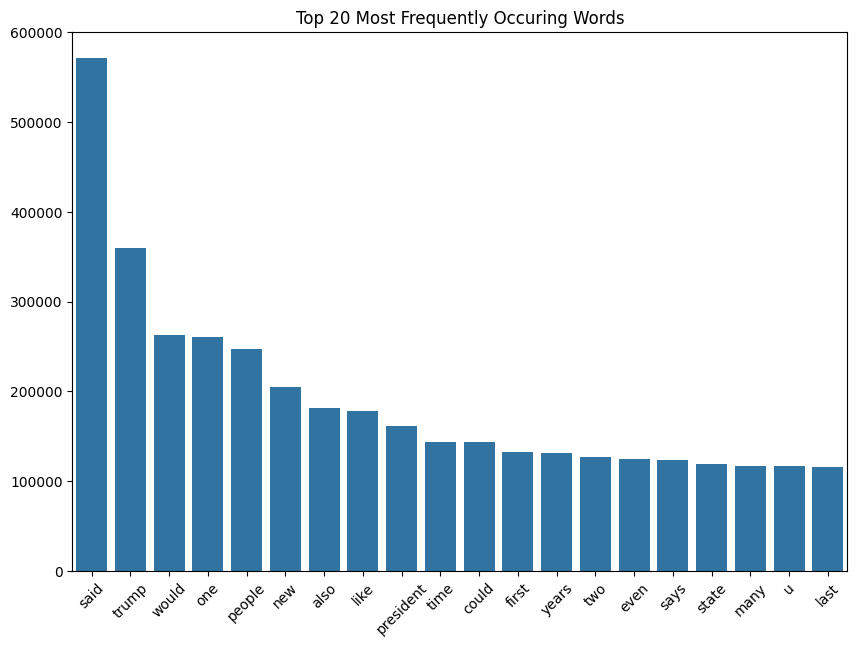

In [14]:
plt.figure(figsize = (10,7))
plt.xticks(rotation = 45)
sns.barplot(x=words, y=freq)
plt.title('Top 20 Most Frequently Occuring Words')
plt.show()

**Most Frequently occuring N_grams**

What is an N-gram?
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.

A Bi-gram means two words in a sequence. 'Very good' or 'Too great'
A Tri-gram means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.

For separating text into n-grams, we will use CountVectorizer from Sklearn

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
def lemmatize_content(text):
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    
    # Convert the lemmatized tokens back into a string
    lemmatized_string = ' '.join(lemmatized_tokens)
    
    return lemmatized_string

In [17]:
df['lematized_content'] = df['content_list'].apply(lemmatize_content)

In [18]:
df['lematized_content']

0         washington congressional republican new fear c...
1         bullet shell get counted blood dry votive cand...
2         walt disney bambi opened 1942 critic praised s...
3         death may great equalizer isnt necessarily eve...
4         seoul south korea north korea leader kim said ...
                                ...                        
142565    uber driver keith avila picked passenger looke...
142566    crew friday continued search lake erie plane c...
142567    obama administration announced massive effort ...
142568    story updated new law michigan prohibit local ...
142569    nation first recreational marijuana shop opene...
Name: lematized_content, Length: 142570, dtype: object

In [19]:
count = 0
lis = []
for j in range(len(df['lematized_content'])):
    temp1 = str(df.lematized_content[j]).split()
    temp2 = str(df.content_t[j]).split()
    for i in range(len(temp1)):
        if(temp1[i] == temp2[i]):
            count += 1
        
        


In [20]:
print(count)

51323306


In [7]:
df['preprocess'] = df['content'].apply(clean)

In [10]:
def collect_stopwords_counts(text_column):
    # Load English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize and filter stopwords for each text in the column
    filtered_words = []
    for text in text_column:
        words = nltk.word_tokenize(text)
        filtered_words.extend([word.lower() for word in words if word.lower() in stop_words])

    # Count the frequency of each stopword
    stopwords_counts = Counter(filtered_words)
    
    return stopwords_counts

# Example usage:
stopwords_counts = collect_stopwords_counts(df['preprocess'])

In [11]:
# Print all stopwords and their counts
for word, count in stopwords_counts.items():
    print(f"{word}: {count}")

have: 493493
a: 2565869
when: 227489
it: 726731
to: 2949053
their: 291262
against: 95363
the: 6016117
they: 383442
no: 164955
which: 220428
of: 2655478
on: 921242
for: 994208
and: 2532138
but: 483409
before: 98434
that: 1429548
in: 2122172
just: 160769
as: 657052
off: 63104
themselves: 21357
up: 193175
who: 371275
been: 241070
an: 412394
about: 317315
its: 386152
some: 163266
are: 459875
out: 205599
how: 131201
after: 190757
has: 437286
until: 33388
at: 512323
by: 482586
not: 463874
this: 437451
be: 478842
will: 268057
all: 212248
m: 22077
had: 282188
over: 142432
from: 466246
during: 78782
won: 23973
s: 125220
his: 521482
or: 303014
if: 217397
such: 70376
other: 156844
between: 67175
these: 98945
what: 215153
was: 717005
under: 58884
those: 110724
is: 989559
with: 697803
down: 73910
once: 34377
more: 284321
were: 289130
there: 190449
than: 184727
them: 147250
so: 196799
her: 257784
she: 261130
same: 56861
hers: 828
here: 63635
we: 311645
i: 501617
where: 99595
into: 148123
own: 62982


In [16]:
# Get the top 10 stopwords counts from the stopwords_counts dictionary
top_stopwords_counts = dict(stopwords_counts.most_common(10))

# Print the top 10 stopwords counts
print("Top 10 stopwords counts:")
for word, count in top_stopwords_counts.items():
    print(f"{word}: {count}")


Top 10 stopwords counts:
the: 6016117
to: 2949053
of: 2655478
a: 2565869
and: 2532138
in: 2122172
that: 1429548
for: 994208
is: 989559
on: 921242


In [17]:
from collections import Counter

def find_rare_words_with_count(text_column, threshold=5):
    # Tokenize words in the text column and flatten the list
    words = [word for text in text_column for word in text.split()]

    # Count the frequency of each word
    word_counts = Counter(words)

    # Find rare words (words with frequency less than the threshold)
    rare_words = {word: count for word, count in word_counts.items() if count < threshold}

    return rare_words

# Example usage:
rare_words_with_count = find_rare_words_with_count(df['preprocess'])

# Print the rare words with their counts
print("Rare words with their counts:")
for word, count in rare_words_with_count.items():
    print(f"{word}: {count}")


Rare words with their counts:
floodlight: 4
argenis: 2
overscrutinized: 1
landesberg: 2
lopuzzos: 3
meenagh: 1
laundryman: 1
romanized: 2
gaing: 1
otiss: 2
okubo: 2
salten: 1
desaturated: 1
kitemaker: 1
funicello: 2
greenswards: 1
telegenically: 2
lovelette: 1
boutros: 4
brookner: 2
rivette: 2
schallert: 2
stettner: 2
prncipe: 2
arduously: 4
erinn: 3
algaier: 2
proietto: 3
canagliflozin: 1
tigger: 2
raval: 1
bedbedbedbedbed: 1
mazzy: 3
polihale: 1
imwithkerr: 1
letsgetleahyed: 1
belz: 4
lyres: 3
zoraidas: 2
muizes: 1
muizs: 3
zaros: 2
nrgs: 2
erector: 3
amines: 2
regenerator: 2
jx: 2
laserlike: 4
coequyt: 4
meriweather: 2
snapfish: 1
shutterfly: 1
adorama: 1
mpix: 1
enlargements: 4
washi: 2
parabo: 3
photojojo: 1
zoomin: 1
upsells: 2
risograph: 1
snapbox: 3
untextured: 2
36x54: 1
24x36: 1
8x12: 1
photobarn: 3
scanmyphotos: 4
pogues: 2
5x11: 1
photoscan: 3
harihareswara: 4
groundbreakings: 2
tallmer: 3
braith: 3
braiths: 1
braithophone: 1
perseveration: 1
faretta: 1
chechi: 3
satyagraha

In [18]:
# Sort the rare words by their counts in ascending order
sorted_rare_words = sorted(rare_words_with_count.items(), key=lambda x: x[1])

# Get the bottom 10 rare words and their counts
bottom_rare_words = dict(sorted_rare_words[:10])

# Print the bottom 10 rare words and their counts
print("Bottom 10 rare words and their counts:")
for word, count in bottom_rare_words.items():
    print(f"{word}: {count}")


Bottom 10 rare words and their counts:
overscrutinized: 1
meenagh: 1
laundryman: 1
gaing: 1
salten: 1
desaturated: 1
kitemaker: 1
greenswards: 1
lovelette: 1
canagliflozin: 1


In [24]:
mostCommon10 = Counter(corpus).most_common(10)

In [ ]:
most

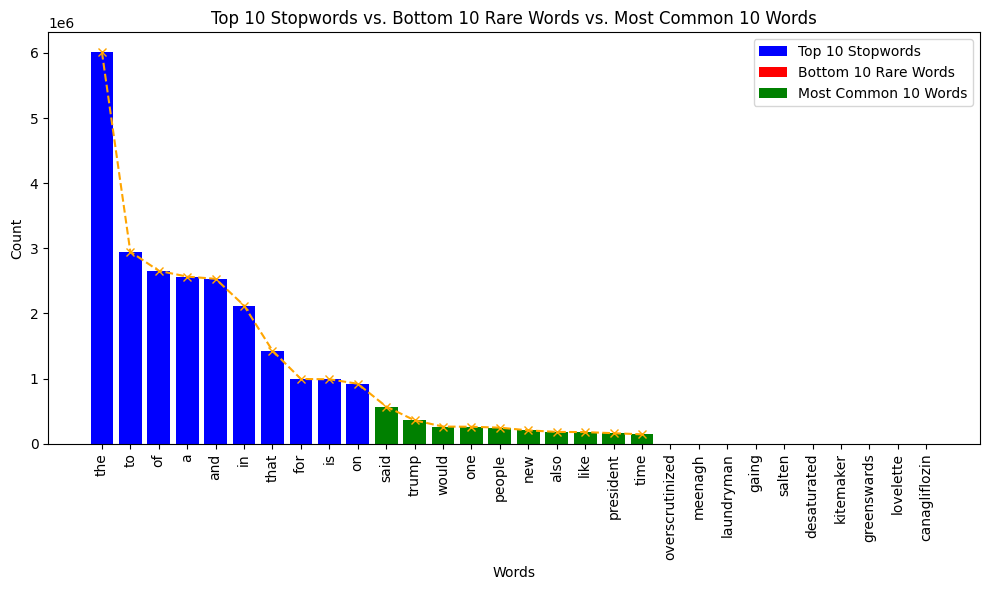

In [65]:
import matplotlib.pyplot as plt

# Define the figure size
fig_size = (10, 6)  # Width, Height

# Create a figure and axis object with specified figure size
fig, ax = plt.subplots(figsize=fig_size)

# Get the words and counts from the most_common(10) dictionary
most_common_words = [word for word, _ in mostCommon10]
most_common_counts = [count for _, count in mostCommon10]

# Get the words and counts from the top stopwords counts dictionary
top_words = list(top_stopwords_counts.keys())
top_counts = list(top_stopwords_counts.values())

# Get the words and counts from the bottom rare words dictionary
bottom_words = list(bottom_rare_words.keys())
bottom_counts = list(bottom_rare_words.values())

# Plot the top stopwords counts
ax.bar(top_words, top_counts, color='blue', label='Top 10 Stopwords')

# Plot the bottom rare words
ax.bar(bottom_words, bottom_counts, color='red', label='Bottom 10 Rare Words')

# Plot the most common 10 words with a different color
ax.bar(most_common_words, most_common_counts, color='green', label='Most Common 10 Words')

# Set the y-axis label
ax.set_ylabel('Count')

# Set the x-axis label
ax.set_xlabel('Words')

# Set the title
ax.set_title('Top 10 Stopwords vs. Bottom 10 Rare Words vs. Most Common 10 Words')

# Show legend with increased gap between legend entries
ax.legend(handlelength=2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Overlay a line plot on top of the bar plot
ax.plot(range(len(top_words)), top_counts, color='orange', marker='x', linestyle='--')

# Adjust layout to increase space between legend and plot
plt.tight_layout()

# Show the plot
plt.show()


In [82]:
import nltk
from nltk.tokenize import word_tokenize

# Function to tokenize text
def tokenize_text(text):
    # Tokenize the text using NLTK word_tokenize
    tokens = word_tokenize(text)
    return tokens

In [83]:
# Apply the tokenization function to the 'content' column
df['tokens'] = df['content'].apply(tokenize_text)

In [98]:
df.head(10)

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   
5  17288  Sick With a Cold, Queen Elizabeth Misses New Y...  New York Times   
6  17289  Taiwan’s President Accuses China of Renewed In...  New York Times   
7  17290  After ‘The Biggest Loser,’ Their Bodies Fought...  New York Times   
8  17291  First, a Mixtape. Then a Romance. - The New Yo...  New York Times   
9  17292  Calling on Angels While Enduring the Trials of...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   
5                    Sewell Chan  2017-01-02  2017.0    1.0  NaN   
6            Javier C. Hernández  2017-01-02  2017.0    1.0  NaN   
7                    Gina Kolata  2017-02-08  2017.0    2.0  NaN   
8               Katherine Rosman  2016-12-31  2016.0   12.0  NaN   
9                    Andy Newman  2016-12-31  2016.0   12.0  NaN   

                                             content  Length  Word_count  \
0  WASHINGTON  —   Congressional Republicans have...    5607         884   
1  After the bullet shells get counted, the blood...   27834        4770   
2  When Walt Disney’s “Bambi” opened in 1942, cri...   14018        2389   
3  Death may be the great equalizer, but it isn’t...   12274        2119   
4  SEOUL, South Korea  —   North Korea’s leader, ...    4195         694   
5  LONDON  —   Queen Elizabeth II, who has been b...     911         159   
6  BEIJING  —   President Tsai   of Taiwan sharpl...    3549         571   
7  Danny Cahill stood, slightly dazed, in a blizz...   17996        3194   
8  Just how   is Hillary Kerr, the    founder of ...    8890        1610   
9  Angels are everywhere in the Muñiz family’s ap...    4585         818   

   mean_word_length  mean_sent_length  \
0          5.303167        214.692308   
1          4.807128        128.455814   
2          4.812892        120.878261   
3          4.748938        154.367089   
4          4.978386        166.840000   
5          4.679245        129.285714   
6          5.197898        153.347826   
7          4.612711        108.072727   
8          4.501863        107.426829   
9          4.573350         75.416667   

                                              tokens  
0  [WASHINGTON, —, Congressional, Republicans, ha...  
1  [After, the, bullet, shells, get, counted, ,, ...  
2  [When, Walt, Disney, ’, s, “, Bambi, ”, opened...  
3  [Death, may, be, the, great, equalizer, ,, but...  
4  [SEOUL, ,, South, Korea, —, North, Korea, ’, s...  
5  [LONDON, —, Queen, Elizabeth, II, ,, who, has,...  
6  [BEIJING, —, President, Tsai, of, Taiwan, shar...  
7  [Danny, Cahill, stood, ,, slightly, dazed, ,, ...  
8  [Just, how, is, Hillary, Kerr, ,, the, founder...  
9  [Angels, are, everywhere, in, the, Muñiz, fami...

In [90]:
from gensim.models import Word2Vec 

In [91]:
model = Word2Vec.load("./Model/news_article.model")

In [96]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words, sample=0):
    if sample > 0:
        words = np.random.choice(words, sample)
    word_vectors = np.array([model.wv.get_vector(w) for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,8))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

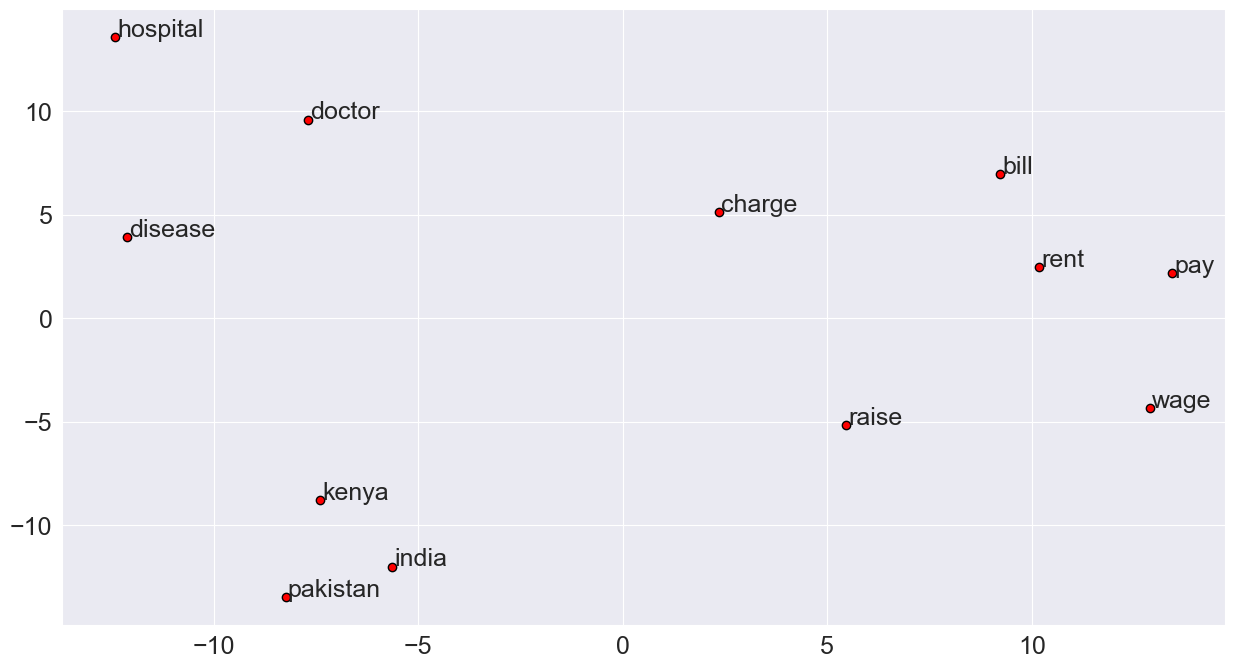

In [102]:
display_pca_scatterplot(model, ['disease',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'wage', 'raise', 'bill', 'rent', 'charge', 'india'])

In [110]:
print(model.wv.most_similar('bangalore'))

[('hyderabad', 0.6261561512947083), ('chennai', 0.5860621929168701), ('mumbai', 0.5397812724113464), ('kolkata', 0.5280529856681824), ('delhi', 0.5266814231872559), ('pune', 0.525837242603302), ('gurgaon', 0.5103428363800049), ('india', 0.5100978016853333), ('lucknow', 0.5016509294509888), ('jawaharlal', 0.49946632981300354)]


In [117]:
print(model.wv.doesnt_match(['bangalore', 'queen', 'king']))

bangalore


In [120]:
print(model.wv.similarity('basketball','football'))

0.65656734
